# EDA

경상남도와 합천의 방문객수와 지출액을 전국과 경상남도에 각각 비교하는 그래프



* 데이터: [ 한국 관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)
* 기간: 2023년 3월 ~2024년 3월 (마스크 해재 2023년 3월)




1.   전국 vs. 경상남도 방문자 수
2.   경상남도 vs. 경상남도 합천 방문자수
3.   전국 vs. 경상남도 지출액
4.   경상남도 vs. 경상남도 합천 지출액



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 다운로드
import pandas as pd
import geopandas as gpd
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [4]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정




In [ ]:
# 경상남도와 합천 데이터

# Visitor1은 전국 방문자
# Comp1은 전국 지출액

# Visitor2은 경상남도 방문자
# Comp2은 경상남도 관광소비 내국인
# Comp3은 경상남도 관광소비 외국인

# Visitor3은 경상남도 합천 방문자
# Comp4은 경상남도 합천 관광소비 내국인
# Comp5은 경상남도 합천 관광소비 외국인


In [ ]:
# Visitor1은 전국 방문자
Visitor1 = pd.read_csv('/content/drive/MyDrive/Data/전국_방문자수.csv',encoding='euc-kr')
Visitor1 = pd.DataFrame(Visitor1)
print(Visitor1)

        시도명         방문자수     전년도 방문자수
0     서울특별시  605044583.0  582663606.0
1     부산광역시  152310111.0  143160296.0
2     대구광역시  104317251.0  102983149.0
3     인천광역시  185284210.0  166500397.0
4     광주광역시   67394983.0   66089103.0
5     대전광역시   83445565.0   78547135.0
6     울산광역시   49974216.0   47853753.0
7   세종특별자치시   27616051.0   27485118.0
8       경기도  638975405.0  621885749.0
9      충청북도  114236927.0  111127320.0
10     충청남도  166806729.0  163064687.0
11     전라남도  129978416.0  130077875.0
12     경상북도  180341920.0  183195878.0
13     경상남도  157802800.0  154002955.0
14  제주특별자치도   61620102.0   67906806.0
15  강원특별자치도  150302413.0  157521148.0
16  전북특별자치도   97253402.0   97480687.0


<ipython-input-11-4c7275de0f45>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도명', y='방문자수', data=Visitor1, palette='viridis')


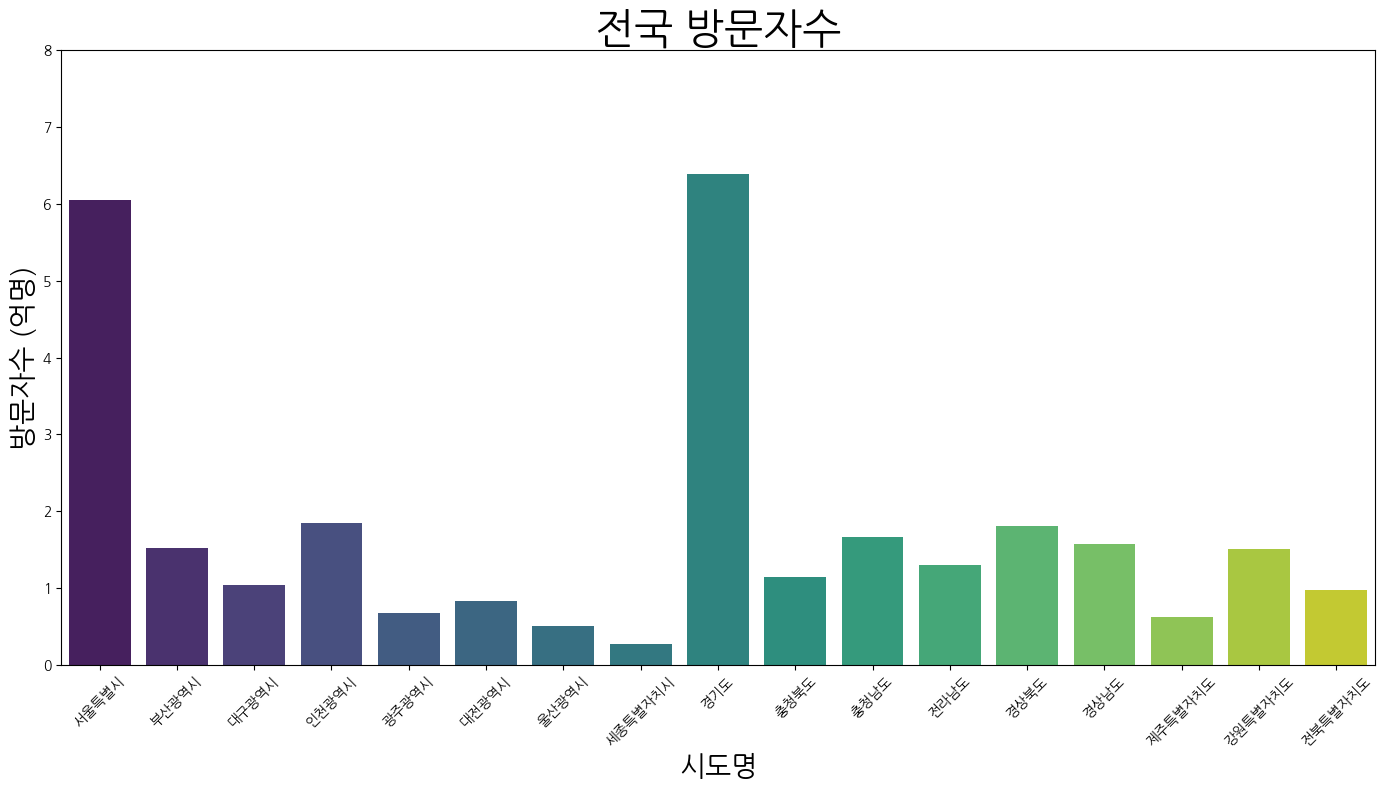

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Convert 방문자수 to hundreds of millions for better scaling
Visitor1['방문자수'] = [x / 1e8 for x in Visitor1['방문자수']]

# Create barplot
sns.barplot(x='시도명', y='방문자수', data=Visitor1, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis ticks from 0 to 8
plt.yticks(np.arange(0, 9, 1))

# Set labels and title with bold font and larger size
plt.xlabel('시도명', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (억명)', fontsize=20, fontweight='bold')
plt.title('전국 방문자수', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Comp1은 전국 관광지출액
Comp1 = pd.read_csv('/content/drive/MyDrive/Data/전국_관광지출액.csv',encoding='euc-kr')
Comp1 = pd.DataFrame(Comp1)
print(Comp1)

        시도명         관광지출액     전년도 관광지출액
0     서울특별시  1.233740e+10  1.257661e+10
1     부산광역시  3.194720e+09  3.192312e+09
2     대구광역시  1.927257e+09  1.878744e+09
3     인천광역시  2.038031e+09  1.895249e+09
4     광주광역시  9.524666e+08  9.825378e+08
5     대전광역시  1.678364e+09  1.612687e+09
6     울산광역시  5.733084e+08  5.803017e+08
7   세종특별자치시  1.053536e+08  1.039018e+08
8       경기도  9.675263e+09  9.740591e+09
9      충청북도  1.055093e+09  1.078611e+09
10     충청남도  1.218538e+09  1.226017e+09
11     전라남도  9.989053e+08  9.981888e+08
12     경상북도  1.281150e+09  1.306805e+09
13     경상남도  1.577898e+09  1.598302e+09
14  제주특별자치도  1.031172e+09  1.228741e+09
15  강원특별자치도  1.319440e+09  1.405529e+09
16  전북특별자치도  7.319387e+08  7.961717e+08


<ipython-input-20-f51f4eed1e6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도명', y='관광지출액', data=Comp1, palette='viridis')


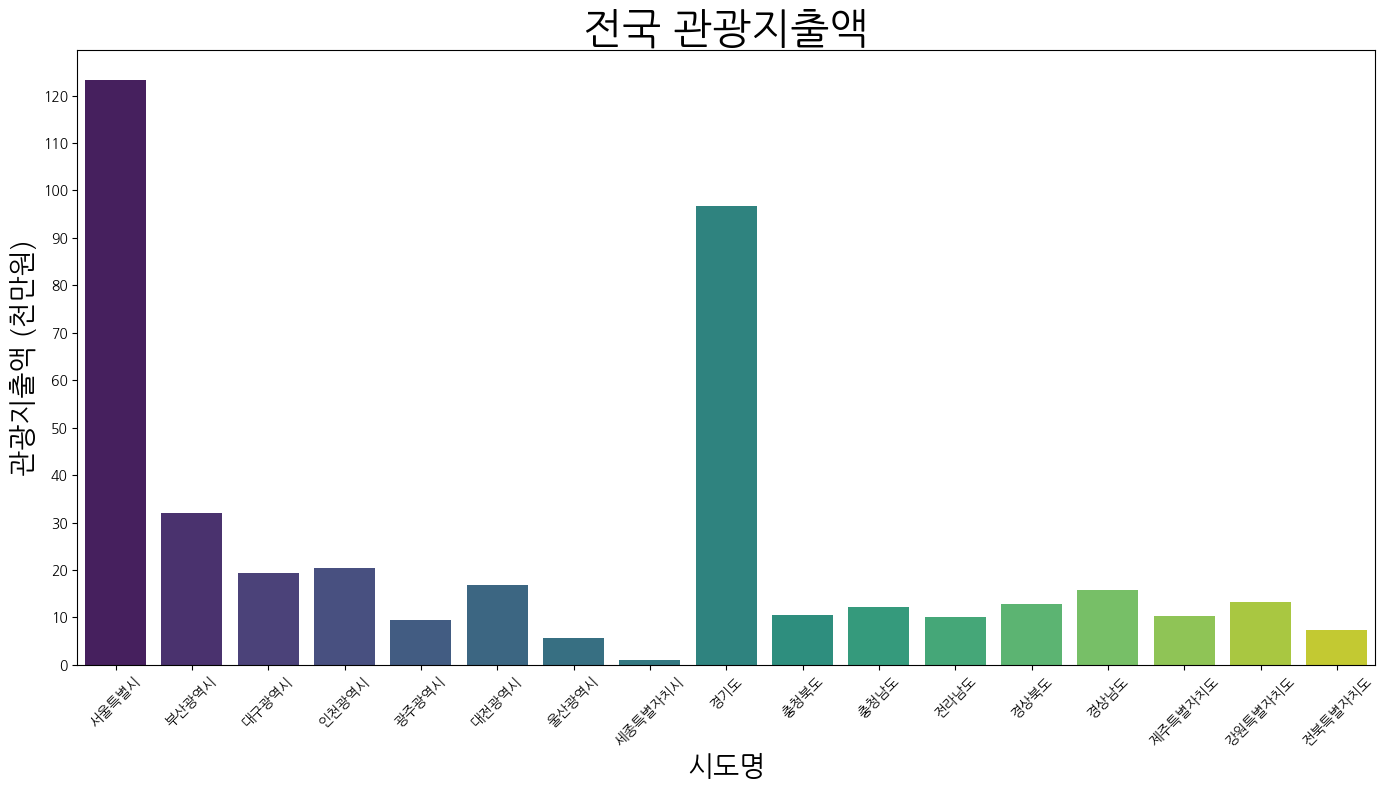

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Convert 방문자수 to hundreds of millions for better scaling
Comp1['관광지출액'] = [x / 1e8 for x in Comp1['관광지출액']]

# Create barplot
sns.barplot(x='시도명', y='관광지출액', data=Comp1, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis ticks from 0 to 130 step을 10
plt.yticks(np.arange(0, 130, 10))

# Set labels and title with bold font and larger size
plt.xlabel('시도명', fontsize=20, fontweight='bold')
plt.ylabel('관광지출액 (천만원)', fontsize=20, fontweight='bold')
plt.title('전국 관광지출액', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Visitor2은 경상남도 방문자
Visitor2 = pd.read_csv('/content/drive/MyDrive/Data/경상남도_방문객.csv',encoding='euc-kr')
Visitor2 = pd.DataFrame(Visitor2)
print(Visitor2)

      기준년월        방문자수    전년동월방문자수  방문자수증감률
0   202303  13761143.0  11540998.0     19.2
1   202304  12455848.0  11738246.0      6.1
2   202305  13514705.0  13202213.0      2.4
3   202306  12311514.0  11873464.0      3.7
4   202307  13275771.0  13934455.0     -4.7
5   202308  14035716.0  14262148.0     -1.6
6   202309  14560772.0  13591685.0      7.1
7   202310  14198291.0  14027482.0      1.2
8   202311  11913301.0  11917885.0     -0.0
9   202312  12024793.0  11502504.0      4.5
10  202401  11947715.0  13464355.0    -11.3
11  202402  13432639.0  10727371.0     25.2
12  202403  14131728.0  13761143.0      2.7


In [ ]:
data = {
    '기준년월': ['202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312', '202401', '202402', '202403'],
    '방문자수': [13761143.0, 12455848.0, 13514705.0, 12311514.0, 13275771.0, 14035716.0, 14560772.0, 14198291.0, 11913301.0, 12024793.0, 11947715.0, 13432639.0, 14131728.0],
    '전년동월방문자수': [11540998.0, 11738246.0, 13202213.0, 11873464.0, 13934455.0, 14262148.0, 13591685.0, 14027482.0, 11917885.0, 11502504.0, 13464355.0, 10727371.0, 13761143.0],
    '방문자수증감률': [19.2, 6.1, 2.4, 3.7, -4.7, -1.6, 7.1, 1.2, -0.0, 4.5, -11.3, 25.2, 2.7]
}


In [ ]:

# Convert the data to a DataFrame
Visitor2 = pd.DataFrame(data)


# Convert '기준년월' to datetime format
Visitor2['기준년월'] = pd.to_datetime(Visitor2['기준년월'], format='%Y%m')


# Convert 방문자수 to hundreds of millions for better scaling
Visitor2['방문자수'] = [x / 1e6 for x in Visitor2['방문자수']]


In [ ]:
Visitor2

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-03-01,13.761143,11540998.0,19.2
1,2023-04-01,12.455848,11738246.0,6.1
2,2023-05-01,13.514705,13202213.0,2.4
3,2023-06-01,12.311514,11873464.0,3.7
4,2023-07-01,13.275771,13934455.0,-4.7
5,2023-08-01,14.035716,14262148.0,-1.6
6,2023-09-01,14.560772,13591685.0,7.1
7,2023-10-01,14.198291,14027482.0,1.2
8,2023-11-01,11.913301,11917885.0,-0.0
9,2023-12-01,12.024793,11502504.0,4.5


<ipython-input-36-ac619f5ce047>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Visitor2['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor2, palette='viridis')


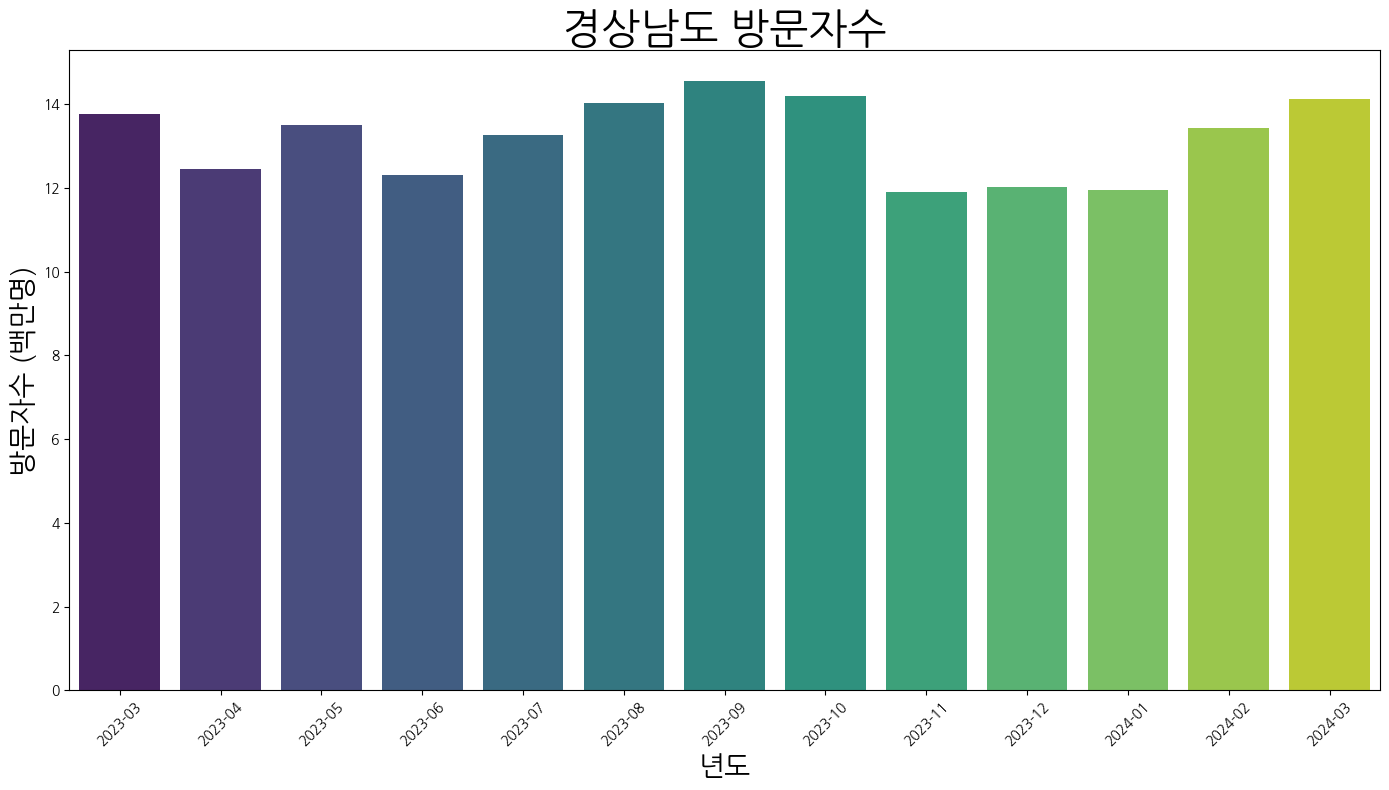

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create barplot
sns.barplot(x=Visitor2['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor2, palette='viridis')

plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (백만명)', fontsize=20, fontweight='bold')
plt.title('경상남도 방문자수', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Comp2은 경상남도 관광소비 내국인
Comp2 = pd.read_csv('/content/drive/MyDrive/Data/경상남도_전국_대비_관광소비_추이_내국인.csv',encoding='euc-kr')
Comp2 = pd.DataFrame(Comp2)
print(Comp2)

      기준연월   지역명  관광소비액(백만원)  전국 관광소비액(백만원)  전국 대비 관광소비율
0   202303  경상남도      130919        3478043          3.8
1   202304  경상남도      139724        3619532          3.9
2   202305  경상남도      142154        3803919          3.7
3   202306  경상남도      133149        3569349          3.7
4   202307  경상남도      134376        3589248          3.7
5   202308  경상남도      134135        3506755          3.8
6   202309  경상남도      131610        3456150          3.8
7   202310  경상남도      142735        3672830          3.9
8   202311  경상남도      125443        3352999          3.7
9   202312  경상남도      129557        3565655          3.6
10  202401  경상남도      115631        3070452          3.8
11  202402  경상남도      117478        3028104          3.9
12  202403  경상남도      131907        3480463          3.8


In [ ]:
# 기준년월을 월별로 나눔
Comp2['기준년월'] = pd.to_datetime(Comp2['기준연월'], format='%Y%m')
Comp2

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월
0,202303,경상남도,130919,3478043,3.8,2023-03-01
1,202304,경상남도,139724,3619532,3.9,2023-04-01
2,202305,경상남도,142154,3803919,3.7,2023-05-01
3,202306,경상남도,133149,3569349,3.7,2023-06-01
4,202307,경상남도,134376,3589248,3.7,2023-07-01
5,202308,경상남도,134135,3506755,3.8,2023-08-01
6,202309,경상남도,131610,3456150,3.8,2023-09-01
7,202310,경상남도,142735,3672830,3.9,2023-10-01
8,202311,경상남도,125443,3352999,3.7,2023-11-01
9,202312,경상남도,129557,3565655,3.6,2023-12-01


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp2['경상남도_관광소비액(억원)'] = [x / 100 for x in Comp2['관광소비액(백만원)']]

# Convert 방문자수 to hundreds of millions for better scaling
Comp2['전국_관광소비액(억원)'] = [x / 100 for x in Comp2['전국 관광소비액(백만원)']]

<Figure size 1400x800 with 0 Axes>

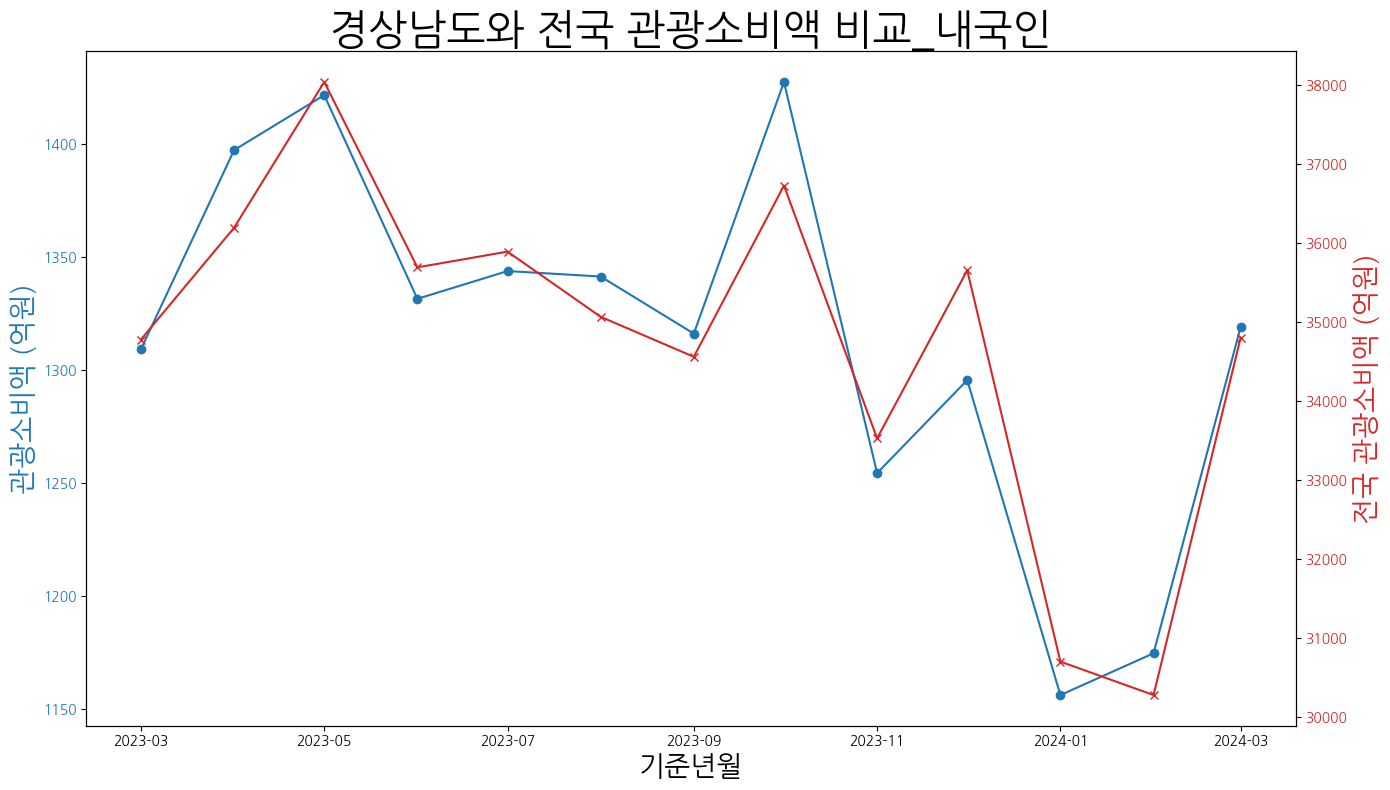

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp2['기준년월'], Comp2['경상남도_관광소비액(억원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp2['기준년월'], Comp2['전국_관광소비액(천억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도와 전국 관광소비액 비교_내국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()

In [ ]:
# Comp3은 경상남도 관광소비 외국인
Comp3 = pd.read_csv('/content/drive/MyDrive/Data/경상남도_전국_대비_관광소비_추이_외국인.csv',encoding='euc-kr')
Comp3 = pd.DataFrame(Comp3)
print(Comp3)

      기준연월   지역명  관광소비액(백만원)  전국 관광소비액(백만원)  전국 대비 관광소비율
0   202303  경상남도      2869.0       513251.0          0.6
1   202304  경상남도      3279.0       662625.0          0.5
2   202305  경상남도      3688.0       685044.0          0.5
3   202306  경상남도      3013.0       692638.0          0.4
4   202307  경상남도      3560.0       718822.0          0.5
5   202308  경상남도      2984.0       810705.0          0.4
6   202309  경상남도      4079.0       820926.0          0.5
7   202310  경상남도      4563.0       943138.0          0.5
8   202311  경상남도      3813.0       754543.0          0.5
9   202312  경상남도      3276.0       749427.0          0.4
10  202401  경상남도      3098.0       660332.0          0.5
11  202402  경상남도      2594.0       523129.0          0.5
12  202403  경상남도      3800.0       786888.0          0.5


In [ ]:
# 기준년월을 월별로 나눔
Comp3['기준년월'] = pd.to_datetime(Comp3['기준연월'], format='%Y%m')
Comp3

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,경상남도_관광소비액(억원),전국_관광소비액(억원),기준년월
0,202303,경상남도,2869.0,513251.0,0.6,28.69,5132.51,2023-03-01
1,202304,경상남도,3279.0,662625.0,0.5,32.79,6626.25,2023-04-01
2,202305,경상남도,3688.0,685044.0,0.5,36.88,6850.44,2023-05-01
3,202306,경상남도,3013.0,692638.0,0.4,30.13,6926.38,2023-06-01
4,202307,경상남도,3560.0,718822.0,0.5,35.60,7188.22,2023-07-01
5,202308,경상남도,2984.0,810705.0,0.4,29.84,8107.05,2023-08-01
6,202309,경상남도,4079.0,820926.0,0.5,40.79,8209.26,2023-09-01
7,202310,경상남도,4563.0,943138.0,0.5,45.63,9431.38,2023-10-01
8,202311,경상남도,3813.0,754543.0,0.5,38.13,7545.43,2023-11-01
9,202312,경상남도,3276.0,749427.0,0.4,32.76,7494.27,2023-12-01


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp3['경상남도_관광소비액(억원)'] = [x / 100 for x in Comp3['관광소비액(백만원)']]

# Convert 방문자수 to hundreds of millions for better scaling
Comp3['전국_관광소비액(억원)'] = [x / 100 for x in Comp3['전국 관광소비액(백만원)']]

<Figure size 1400x800 with 0 Axes>

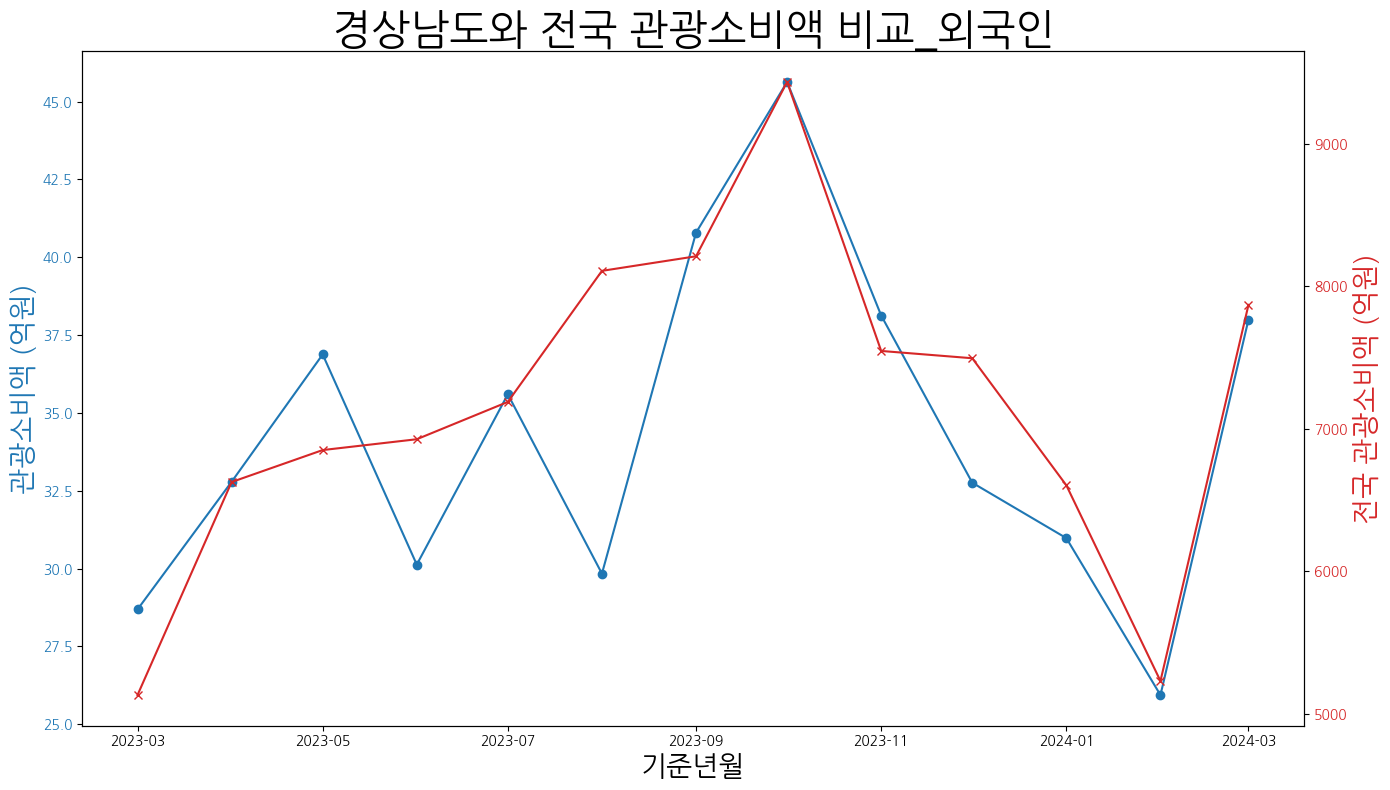

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp3['기준년월'], Comp3['경상남도_관광소비액(억원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp3['기준년월'], Comp3['전국_관광소비액(억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도와 전국 관광소비액 비교_외국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()

In [ ]:
# Visitor3은 경상남도 합천 방문자

Visitor3 = pd.read_csv('/content/drive/MyDrive/Data/합천_방문자_수_추이.csv',encoding='euc-kr')
Visitor3 = pd.DataFrame(Visitor3)
print(Visitor3)

      기준년월      방문자수  전년동월방문자수  방문자수증감률
0   202303  529540.0  431926.0     22.6
1   202304  680506.0  620954.0      9.6
2   202305  726455.0  832907.0    -12.8
3   202306  554239.0  530180.0      4.5
4   202307  523645.0  567426.0     -7.7
5   202308  557382.0  625746.0    -10.9
6   202309  693127.0  692193.0      0.1
7   202310  790513.0  833353.0     -5.1
8   202311  514694.0  590825.0    -12.9
9   202312  404944.0  420408.0     -3.7
10  202401  394687.0  557764.0    -29.2
11  202402  538270.0  391027.0     37.6
12  202403  512358.0  529540.0     -3.2


In [ ]:
# 기준년월을 월별로 나눔
Visitor3['기준년월'] = pd.to_datetime(Visitor3['기준년월'], format='%Y%m')
Visitor3

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-03-01,529540.0,431926.0,22.6
1,2023-04-01,680506.0,620954.0,9.6
2,2023-05-01,726455.0,832907.0,-12.8
3,2023-06-01,554239.0,530180.0,4.5
4,2023-07-01,523645.0,567426.0,-7.7
5,2023-08-01,557382.0,625746.0,-10.9
6,2023-09-01,693127.0,692193.0,0.1
7,2023-10-01,790513.0,833353.0,-5.1
8,2023-11-01,514694.0,590825.0,-12.9
9,2023-12-01,404944.0,420408.0,-3.7


<ipython-input-62-08e525c8f2ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Visitor3['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor3, palette='viridis')


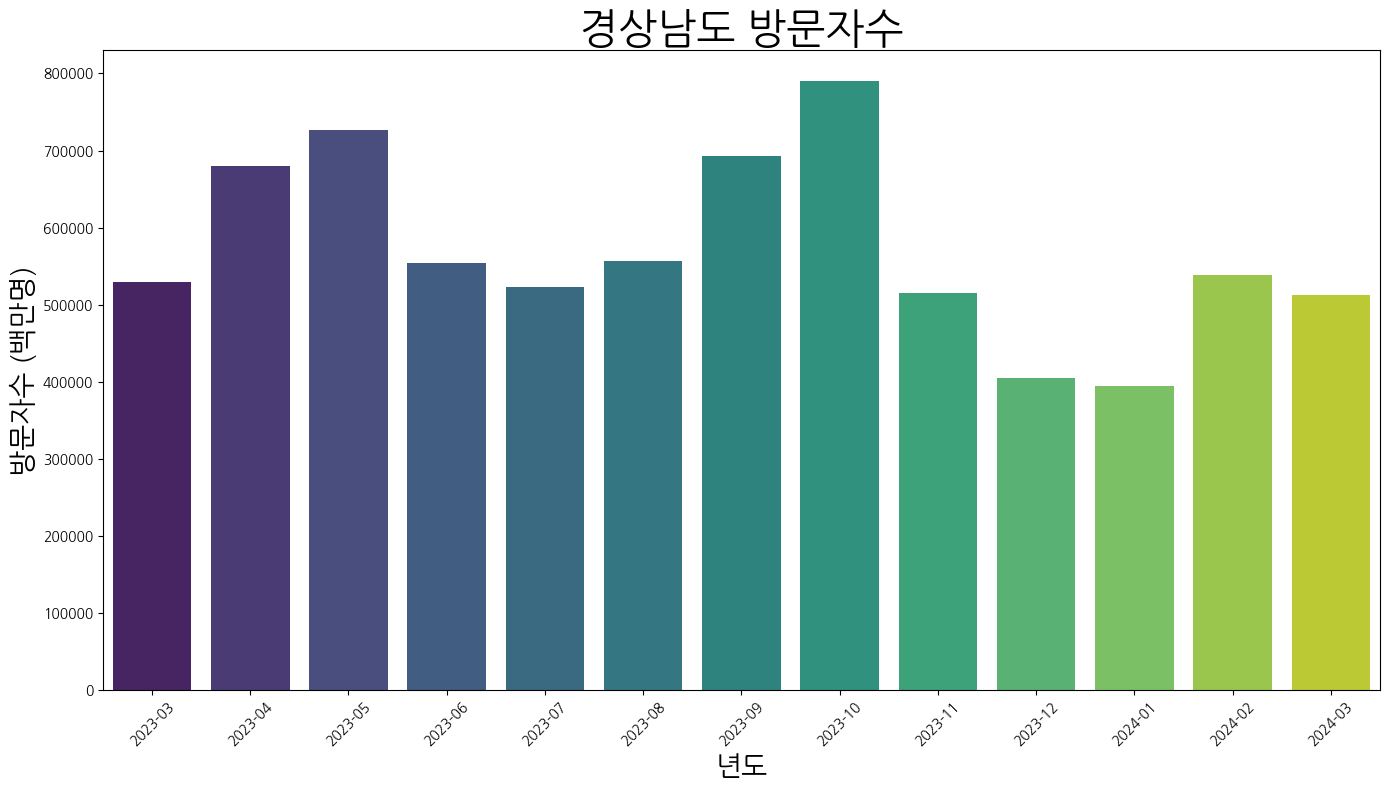

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create barplot
sns.barplot(x=Visitor3['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor3, palette='viridis')

plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (백만명)', fontsize=20, fontweight='bold')
plt.title('경상남도 방문자수', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Comp4은 경상남도 합천 관광소비 내국인

Comp4 = pd.read_csv('/content/drive/MyDrive/Data/내국인_합천_관광소비_수_추이.csv',encoding='euc-kr')
Comp4 = pd.DataFrame(Comp4)
print(Comp4)


      기준년월  소비금 (백만원)  전국 소비금 (백만원)
0   202303       1276       3478043
1   202304       1696       3619532
2   202305       1668       3803919
3   202306       1378       3569349
4   202307       1409       3589248
5   202308       1443       3506755
6   202309       1533       3456150
7   202310       1874       3672830
8   202311       1297       3352999
9   202312        949       3565655
10  202401        871       3070452
11  202402        944       3028104
12  202403       1293       3480463


In [ ]:
# 기준년월을 월별로 나눔
Comp4['기준년월'] = pd.to_datetime(Comp4['기준년월'], format='%Y%m')
Comp4

,기준년월,소비금 (백만원),전국 소비금 (백만원)
0,2023-03-01,1276,3478043
1,2023-04-01,1696,3619532
2,2023-05-01,1668,3803919
3,2023-06-01,1378,3569349
4,2023-07-01,1409,3589248
5,2023-08-01,1443,3506755
6,2023-09-01,1533,3456150
7,2023-10-01,1874,3672830
8,2023-11-01,1297,3352999
9,2023-12-01,949,3565655


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp4['전국_관광소비액(억원)'] = [x / 100 for x in Comp4['전국 소비금 (백만원)']]

<Figure size 1400x800 with 0 Axes>

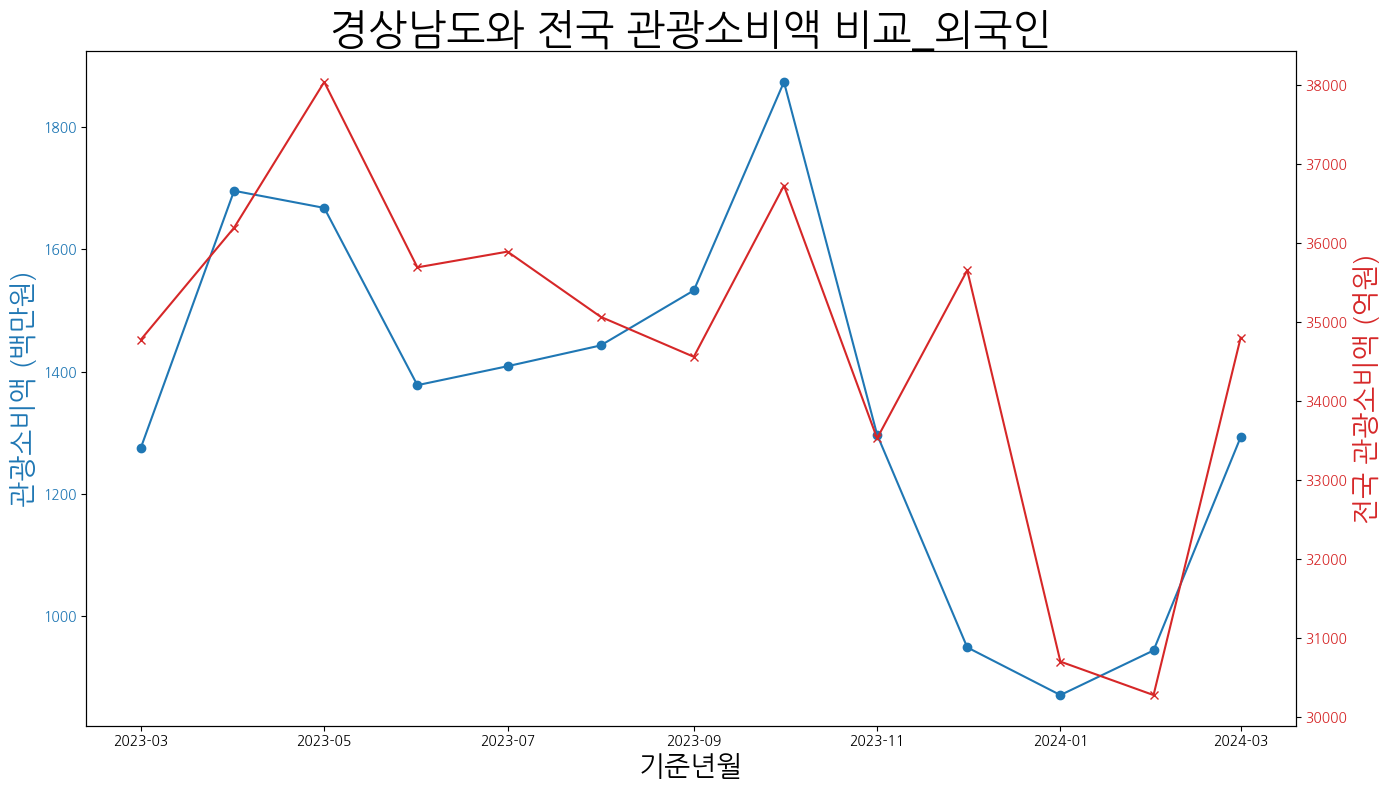

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp4['기준년월'], Comp4['소비금 (백만원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp4['기준년월'], Comp4['전국_관광소비액(억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도 합천와 전국 관광소비액 비교_내국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()

In [ ]:
# Comp5은 경상남도 합천 관광소비 외국인

Comp5 = pd.read_csv('/content/drive/MyDrive/Data/외국인_합천_관광소비_수_추이.csv',encoding='euc-kr')
Comp5 = pd.DataFrame(Comp5)
print(Comp5)

      기준년월  소비금 (백만원)  전국 소비금 (백만원)
0   202303          1        513251
1   202304          5        662625
2   202305          6        685044
3   202306          5        692638
4   202307          5        718822
5   202308          5        810705
6   202309          5        820926
7   202310         11        943138
8   202311          7        754543
9   202312          2        749427
10  202401          2        660332
11  202402          3        523129
12  202403          4        786888


In [ ]:
# 기준년월을 월별로 나눔
Comp5['기준년월'] = pd.to_datetime(Comp5['기준년월'], format='%Y%m')
Comp5

,기준년월,소비금 (백만원),전국 소비금 (백만원),전국_관광소비액(억원)
0,2023-03-01,1,513251,5132.51
1,2023-04-01,5,662625,6626.25
2,2023-05-01,6,685044,6850.44
3,2023-06-01,5,692638,6926.38
4,2023-07-01,5,718822,7188.22
5,2023-08-01,5,810705,8107.05
6,2023-09-01,5,820926,8209.26
7,2023-10-01,11,943138,9431.38
8,2023-11-01,7,754543,7545.43
9,2023-12-01,2,749427,7494.27


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp5['전국_관광소비액(억원)'] = [x / 100 for x in Comp5['전국 소비금 (백만원)']]

<Figure size 1400x800 with 0 Axes>

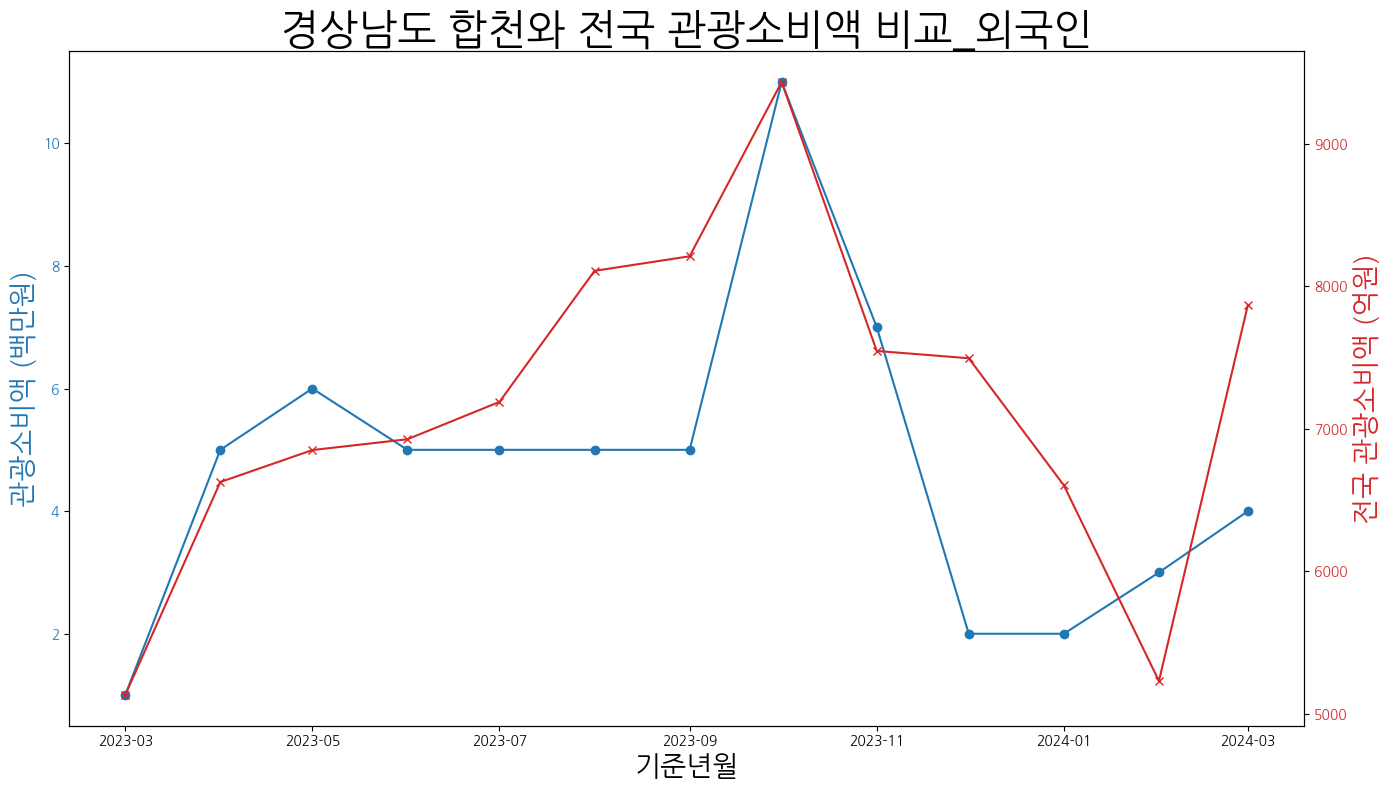

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp5['기준년월'], Comp5['소비금 (백만원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp5['기준년월'], Comp5['전국_관광소비액(억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도 합천와 전국 관광소비액 비교_외국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()